## Importando as bibliotecas

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carregando o dataset

In [366]:
pd.set_option('display.max_columns', None)

In [367]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

## EDA - Exploratory Data Analysis

### Análise Exploratória

In [368]:
df.shape

(41188, 21)

In [369]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Dados do cliente bancário:
- age --> (numérico)
- job --> tipo de trabalho (categórico: 'administrador', 'operário', 'empreendedor', 'empregada doméstica', 'gestão', 'aposentado', 'autônomo', 'serviços', 'estudante', ' técnico', 'desempregado', 'desconhecido')
- marital --> estado civil (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' significa divorciado ou viúvo)
- education --> (categórica: 'básico.4a', 'básico.6a', 'básico.9a', 'ensino médio', 'analfabeto', 'curso.profissional', 'grau universitário', 'desconhecido')
- default --> tem crédito em inadimplência? (categórico: 'não', 'sim', 'desconhecido')
- housing --> tem crédito à habitação? (categórico: 'não', 'sim', 'desconhecido')
- loan --> tem empréstimo pessoal? (categórico: 'não', 'sim', 'desconhecido')

Relacionado com o último contato da campanha atual:
- contact --> tipo de comunicação de contato (categórica: 'celular', 'telefone')
- month --> último mês de contato do ano (categórico: 'jan', 'fev', 'mar',…, 'nov', 'dec')
- day_of_week --> último dia de contato da semana (categórico: 'seg','ter','qua','qui','sex')
- duration --> duração do último contato, em segundos (numérico). Nota importante: este atributo afeta fortemente o alvo de saída (por exemplo, se duração=0 então y='não'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o término da chamada, y é obviamente conhecido. Assim, este input só deve ser incluído para fins de benchmark e
deve ser descartado se a intenção for ter um modelo preditivo realista.

Outros atributos:
- campaign --> quantidade de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)
- pdays --> número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)
- previous --> número de contatos realizados antes desta campanha e para este cliente (numérico)
- poutcome --> resultado da campanha de marketing anterior (categórica: 'fracasso', 'inexistente', 'sucesso')

Atributos do contexto social e econômico
- emp.var.rate --> taxa de variação do emprego – indicador trimestral (numérico)
- cons.price.idx --> índice de preços ao consumidor - indicador mensal (numérico)
- cons.conf.idx --> índice de confiança do consumidor – indicador mensal (numérico)
- euribor3m --> taxa euribor a 3 meses – indicador diário (numérico)
- nr.employed --> número de empregados – indicador trimestral (numérico)

Variável de saída (alvo desejado):
- y --> o cliente subscreveu um depósito a prazo? (binário: 'sim', 'não')

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [371]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [372]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Histogramas

#### Dados Balanceados?

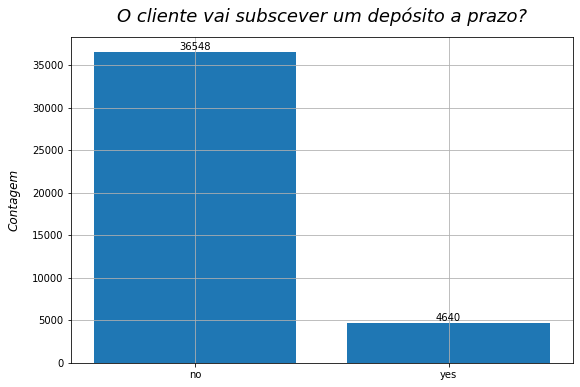

In [373]:
#visualização da quantidade de clientes que vão subscrever um depósito à prazo ou não
fig = plt.subplots(figsize = (9,6))
class_counts = df['y'].value_counts()
plt.bar(class_counts.index, class_counts.values)
for i, count in enumerate(class_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('O cliente vai subscever um depósito a prazo?', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.ylabel('Contagem', fontsize = 12, style = "italic", labelpad = 12)
plt.grid()

In [374]:
#porcentagem de cada classe
total_samples = len(df)
percentage_yes = (class_counts['yes'] / total_samples) * 100
percentage_no = (class_counts['no'] / total_samples) * 100

#print das porcentagens
print(f'"yes": {percentage_yes:.2f}%')
print(f'"no": {percentage_no:.2f}%')

"yes": 11.27%
"no": 88.73%


#### Visualização da Distribuição dos Dados Numéricos

In [375]:
df_numbers = df.select_dtypes(exclude=['object'])

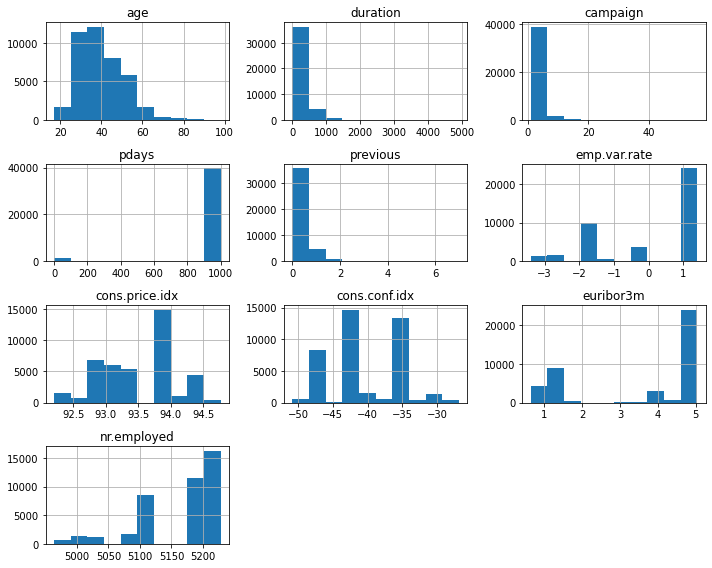

In [376]:
df_numbers.hist(figsize=(10, 8))
plt.tight_layout()

#### Visualização da Distribuição dos Dados Categóricos

In [377]:
df_strings = df.select_dtypes(['object'])

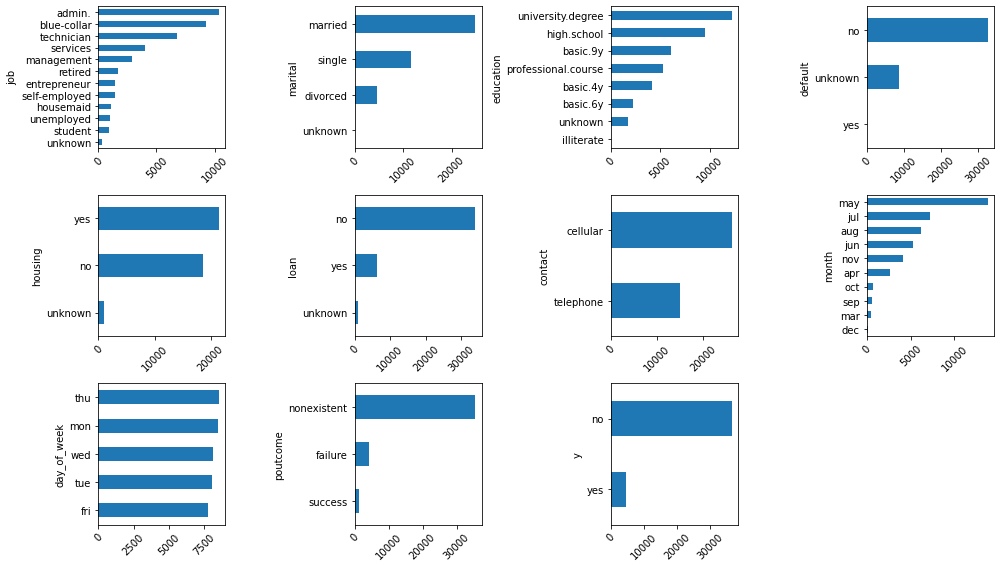

In [378]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(df_strings.columns):
    plt.subplot(3, 4, i + 1)
    df_strings[column].value_counts().plot(kind='barh')
    plt.gca().invert_yaxis() 
    plt.xticks(rotation=45) 
plt.tight_layout()

### Correlação entre as Variáveis

Text(0.5, 1.0, 'Matriz de Correlação')

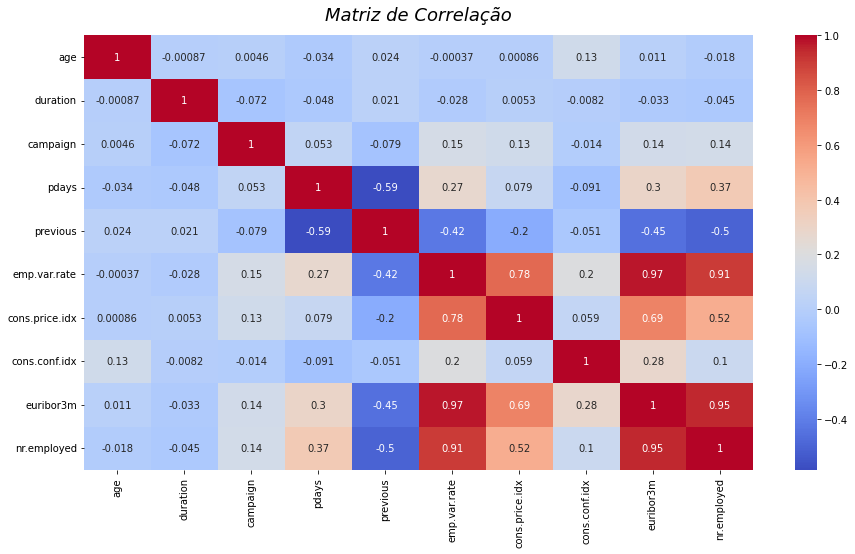

In [379]:
correlacao = df_numbers.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlação', fontsize = 18, style = "italic", loc = "center", pad = 15)

### Análise das Categorias

#### Relação com a variável y

##### Idade x Adesão

In [380]:
fig = px.box(df, x="y", y="age")
fig.update_layout(
    title={
        'text': 'Idade por Adesão',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

##### Duração Último Contato x Subscrição de um Depósito a Prazo

In [381]:
fig = px.box(df, x="y", y="duration")
fig.update_layout(
    title={
        'text': 'Duração do Último Contato por Adesão',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

##### Educação x Adesão

In [382]:
education_y = df.groupby(['education', 'y']).size().reset_index(name='count')
education_y

education    y  count
0              basic.4y   no   3748
1              basic.4y  yes    428
2              basic.6y   no   2104
3              basic.6y  yes    188
4              basic.9y   no   5572
5              basic.9y  yes    473
6           high.school   no   8484
7           high.school  yes   1031
8            illiterate   no     14
9            illiterate  yes      4
10  professional.course   no   4648
11  professional.course  yes    595
12    university.degree   no  10498
13    university.degree  yes   1670
14              unknown   no   1480
15              unknown  yes    251

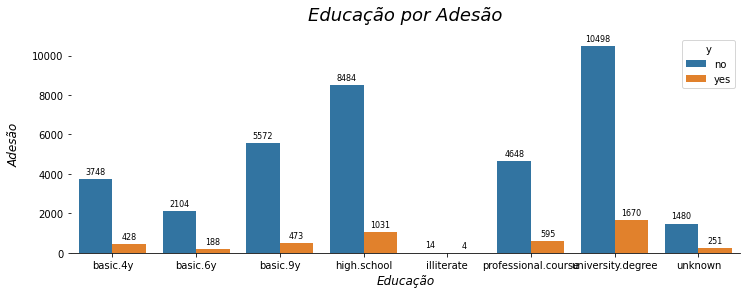

In [383]:
fig, ax = plt.subplots(figsize = (12,4))
sns.barplot(data = education_y, x='education', y='count', hue='y')
plt.title('Educação por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Educação', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Estado Civil x Adesão

In [384]:
marital_y = df.groupby(['marital', 'y']).size().reset_index(name='count')
marital_y

marital    y  count
0  divorced   no   4136
1  divorced  yes    476
2   married   no  22396
3   married  yes   2532
4    single   no   9948
5    single  yes   1620
6   unknown   no     68
7   unknown  yes     12

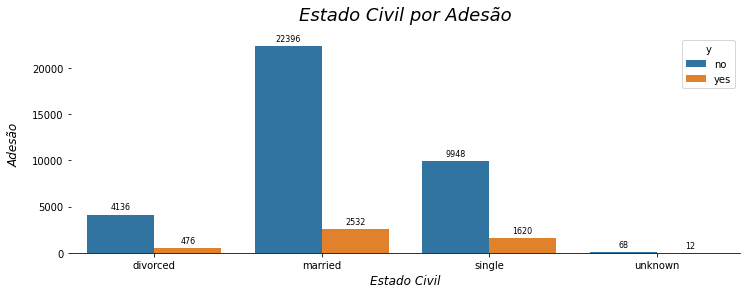

In [385]:
fig, ax = plt.subplots(figsize = (12,4))
sns.barplot(data = marital_y, x='marital', y='count', hue='y')
plt.title('Estado Civil por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Estado Civil', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Emprego x Adesão

In [386]:
job_y = df.groupby(['job', 'y']).size().reset_index(name='count')
job_y

job    y  count
0          admin.   no   9070
1          admin.  yes   1352
2     blue-collar   no   8616
3     blue-collar  yes    638
4    entrepreneur   no   1332
5    entrepreneur  yes    124
6       housemaid   no    954
7       housemaid  yes    106
8      management   no   2596
9      management  yes    328
10        retired   no   1286
11        retired  yes    434
12  self-employed   no   1272
13  self-employed  yes    149
14       services   no   3646
15       services  yes    323
16        student   no    600
17        student  yes    275
18     technician   no   6013
19     technician  yes    730
20     unemployed   no    870
21     unemployed  yes    144
22        unknown   no    293
23        unknown  yes     37

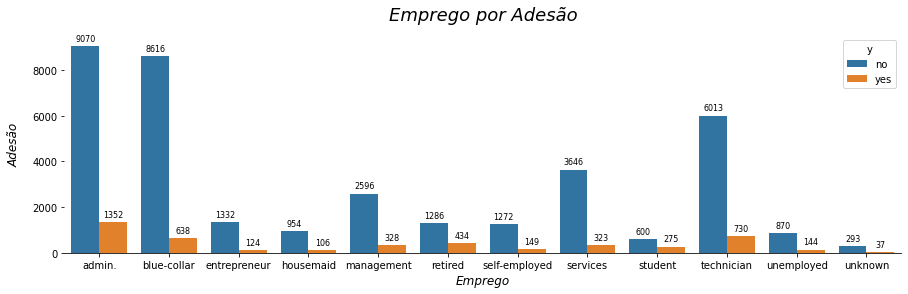

In [387]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = job_y, x='job', y='count', hue='y')
plt.title('Emprego por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Emprego', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Cliente com Crédito em Inadimplência x Adesão

In [388]:
default_y = df.groupby(['default', 'y']).size().reset_index(name='count')
default_y

default    y  count
0       no   no  28391
1       no  yes   4197
2  unknown   no   8154
3  unknown  yes    443
4      yes   no      3

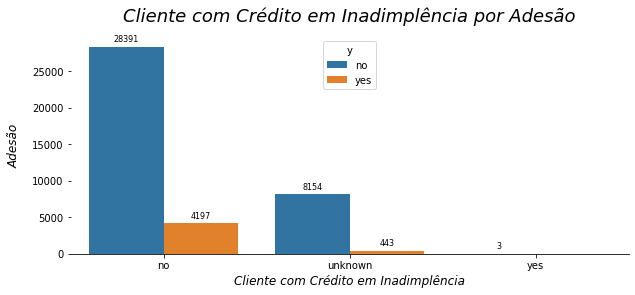

In [389]:
fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = default_y, x='default', y='count', hue='y')
plt.title('Cliente com Crédito em Inadimplência por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Cliente com Crédito em Inadimplência', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Cliente com Crédito à Habitação x Adesão

In [390]:
housing_y = df.groupby(['housing', 'y']).size().reset_index(name='count')
housing_y

housing    y  count
0       no   no  16596
1       no  yes   2026
2  unknown   no    883
3  unknown  yes    107
4      yes   no  19069
5      yes  yes   2507

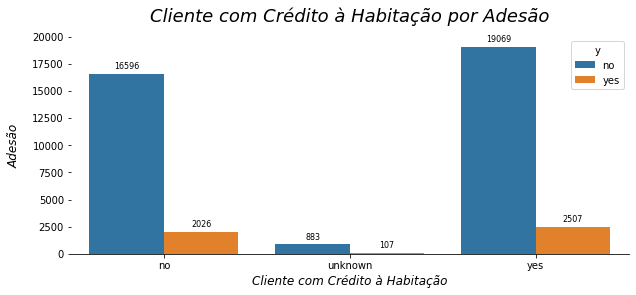

In [391]:
fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = housing_y, x='housing', y='count', hue='y')
plt.title('Cliente com Crédito à Habitação por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Cliente com Crédito à Habitação', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Cliente com Empréstimo Pessoal x Adesão

In [392]:
loan_y = df.groupby(['loan', 'y']).size().reset_index(name='count')
loan_y

loan    y  count
0       no   no  30100
1       no  yes   3850
2  unknown   no    883
3  unknown  yes    107
4      yes   no   5565
5      yes  yes    683

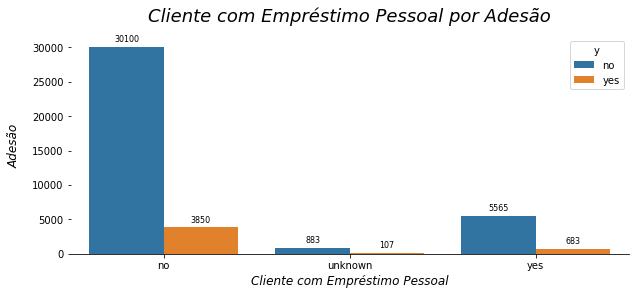

In [393]:
fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = loan_y, x='loan', y='count', hue='y')
plt.title('Cliente com Empréstimo Pessoal por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Cliente com Empréstimo Pessoal', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Último Mês de Contato do Ano x Adesão

In [394]:
month_y = df.groupby(['month', 'y']).size().reset_index(name='count')
month_y

month    y  count
0    apr   no   2093
1    apr  yes    539
2    aug   no   5523
3    aug  yes    655
4    dec   no     93
5    dec  yes     89
6    jul   no   6525
7    jul  yes    649
8    jun   no   4759
9    jun  yes    559
10   mar   no    270
11   mar  yes    276
12   may   no  12883
13   may  yes    886
14   nov   no   3685
15   nov  yes    416
16   oct   no    403
17   oct  yes    315
18   sep   no    314
19   sep  yes    256

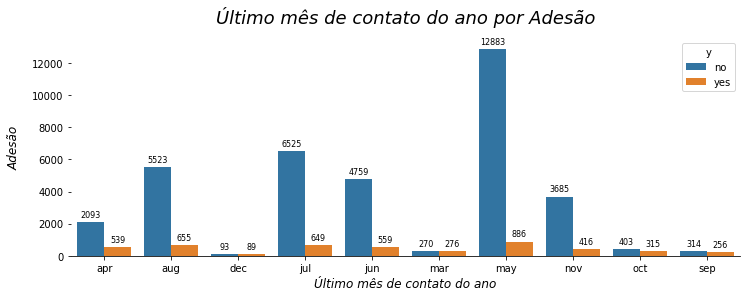

In [395]:
fig, ax = plt.subplots(figsize = (12,4))
sns.barplot(data = month_y, x='month', y='count', hue='y')
plt.title('Último mês de contato do ano por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Último mês de contato do ano', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Último Dia de Contato da Semana x Adesão

In [396]:
day_of_week_y = df.groupby(['day_of_week', 'y']).size().reset_index(name='count')
day_of_week_y

day_of_week    y  count
0         fri   no   6981
1         fri  yes    846
2         mon   no   7667
3         mon  yes    847
4         thu   no   7578
5         thu  yes   1045
6         tue   no   7137
7         tue  yes    953
8         wed   no   7185
9         wed  yes    949

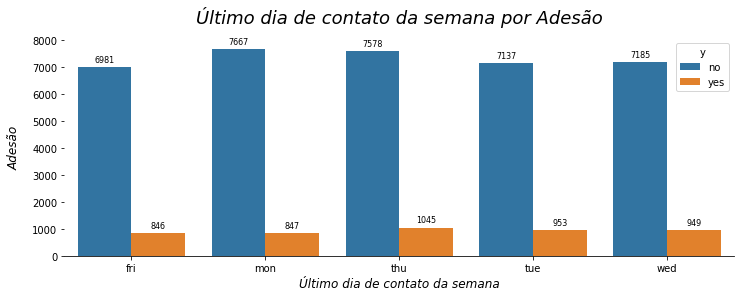

In [397]:
fig, ax = plt.subplots(figsize = (12,4))
sns.barplot(data = day_of_week_y, x='day_of_week', y='count', hue='y')
plt.title('Último dia de contato da semana por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Último dia de contato da semana', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Resultado da campanha de marketing anterior x Adesão Atual

In [398]:
poutcome_y = df.groupby(['poutcome', 'y']).size().reset_index(name='count')
poutcome_y

poutcome    y  count
0      failure   no   3647
1      failure  yes    605
2  nonexistent   no  32422
3  nonexistent  yes   3141
4      success   no    479
5      success  yes    894

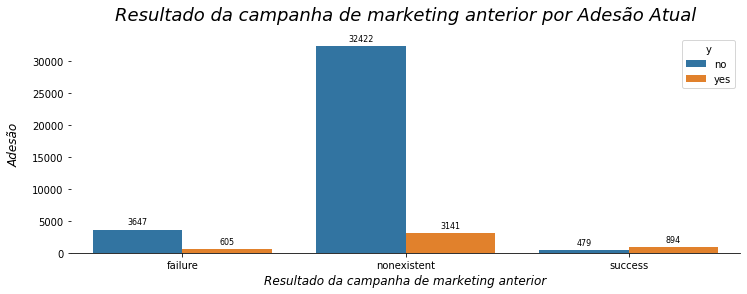

In [399]:
fig, ax = plt.subplots(figsize = (12,4))
sns.barplot(data = poutcome_y, x='poutcome', y='count', hue='y')
plt.title('Resultado da campanha de marketing anterior por Adesão Atual', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Resultado da campanha de marketing anterior', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Quantidade de contatos realizados x Adesão

In [400]:
campaign_y = df.groupby(['campaign', 'y']).size().reset_index(name='count')
campaign_y

campaign    y  count
0          1   no  15342
1          1  yes   2300
2          2   no   9359
3          2  yes   1211
4          3   no   4767
5          3  yes    574
6          4   no   2402
7          4  yes    249
8          5   no   1479
9          5  yes    120
10         6   no    904
11         6  yes     75
12         7   no    591
13         7  yes     38
14         8   no    383
15         8  yes     17
16         9   no    266
17         9  yes     17
18        10   no    213
19        10  yes     12
20        11   no    165
21        11  yes     12
22        12   no    122
23        12  yes      3
24        13   no     88
25        13  yes      4
26        14   no     68
27        14  yes      1
28        15   no     49
29        15  yes      2
30        16   no     51
31        17   no     54
32        17  yes      4
33        18   no     33
34        19   no     26
35        20   no     30
36        21   no     24
37        22   no     17
38        23   no     15
39        23  yes      1
40        24   no     15
41        25   no      8
42        26   no      8
43        27   no     11
44        28   no      8
45        29   no     10
46        30   no      7
47        31   no      7
48        32   no      4
49        33   no      4
50        34   no      3
51        35   no      5
52        37   no      1
53        39   no      1
54        40   no      2
55        41   no      1
56        42   no      2
57        43   no      2
58        56   no      1

> analisar resultados

##### Número de contatos realizados antes da campanha para o cliente x Adesão Atual

In [401]:
previous_y = df.groupby(['previous', 'y']).size().reset_index(name='count')
previous_y

previous    y  count
0          0   no  32422
1          0  yes   3141
2          1   no   3594
3          1  yes    967
4          2   no    404
5          2  yes    350
6          3   no     88
7          3  yes    128
8          4   no     32
9          4  yes     38
10         5   no      5
11         5  yes     13
12         6   no      2
13         6  yes      3
14         7   no      1

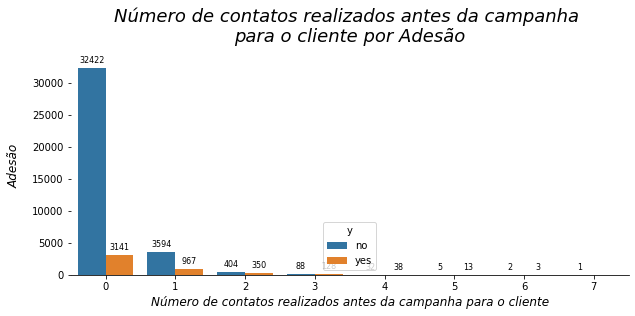

In [402]:
fig, ax = plt.subplots(figsize = (10,4))
sns.barplot(data = previous_y, x='previous', y='count', hue='y')
plt.title('Número de contatos realizados antes da campanha \npara o cliente por Adesão', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Número de contatos realizados antes da campanha para o cliente', fontsize = 12, style = "italic")
plt.ylabel('Adesão', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Tipo de Comunicação x Duração Último Contato x Adesão

In [403]:
fig = px.box(df, x="contact", y="duration", color = 'y')
fig.update_layout(
    title={
        'text': 'Tipo de comunicação pela duração do último contato de acordo com a adesão',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

#### Relação entre os Dados do Cliente 

##### Idade x Trabalho

In [404]:
fig = px.box(df, x='job', y='age', color = 'y')
fig.update_layout(
    title={
        'text': 'Idade por Trabalho de acordo com a adesão',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

##### Idade x Estado Civil

In [405]:
fig = px.box(df, x="marital", y="age", color = 'y')
fig.update_layout(
    title={
        'text': 'Idade por Estado Civil de acordo com a adesão',
        'font': {
            'size': 16
        },
        'x': 0.5 
    })
fig.show()

##### Idade x Crédito em Inadimplência

In [406]:
limites_bins = [16, 27, 37, 47, 57, 67, 77, 87, float('inf')] 
rotulos_classes = ['17-26', '27-36', '37-46', '47-56', '57-66', '67-76', '77-86', '87+']
df['age_class'] = pd.cut(df['age'], bins=limites_bins, labels=rotulos_classes, right=False)

In [407]:
age_default = df.groupby(['age_class', 'default']).size().reset_index(name='count')
age_default

age_class  default  count
0      17-26       no   2160
1      17-26  unknown    204
2      17-26      yes      0
3      27-36       no  13873
4      27-36  unknown   2055
5      27-36      yes      1
6      37-46       no   9029
7      37-46  unknown   3065
8      37-46      yes      0
9      47-56       no   5393
10     47-56  unknown   2528
11     47-56      yes      2
12     57-66       no   1619
13     57-66  unknown    697
14     57-66      yes      0
15     67-76       no    331
16     67-76  unknown     20
17     67-76      yes      0
18     77-86       no    151
19     77-86  unknown     25
20     77-86      yes      0
21       87+       no     32
22       87+  unknown      3
23       87+      yes      0

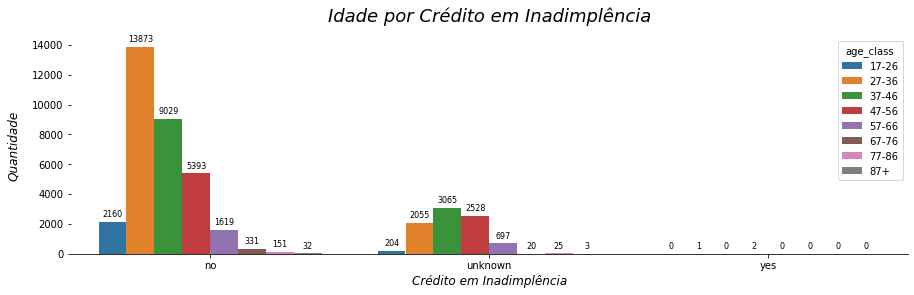

In [408]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = age_default, x='default', y='count', hue = 'age_class')
plt.title('Idade por Crédito em Inadimplência', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Crédito em Inadimplência', fontsize = 12, style = "italic")
plt.ylabel('Quantidade', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Idade x Financiamento de Propriedade

In [409]:
age_housing = df.groupby(['age_class', 'housing']).size().reset_index(name='count')
age_housing

age_class  housing  count
0      17-26       no   1049
1      17-26  unknown     63
2      17-26      yes   1252
3      27-36       no   7132
4      27-36  unknown    379
5      27-36      yes   8418
6      37-46       no   5601
7      37-46  unknown    280
8      37-46      yes   6213
9      47-56       no   3549
10     47-56  unknown    199
11     47-56      yes   4175
12     57-66       no   1050
13     57-66  unknown     59
14     57-66      yes   1207
15     67-76       no    156
16     67-76  unknown      6
17     67-76      yes    189
18     77-86       no     71
19     77-86  unknown      4
20     77-86      yes    101
21       87+       no     14
22       87+  unknown      0
23       87+      yes     21

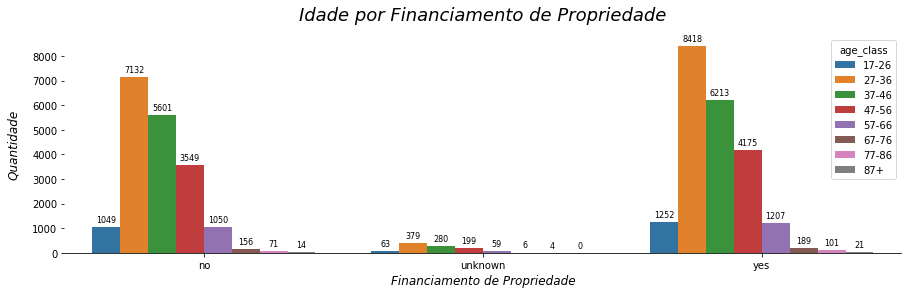

In [410]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = age_housing, x='housing', y='count', hue='age_class')
plt.title('Idade por Financiamento de Propriedade', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Financiamento de Propriedade', fontsize = 12, style = "italic")
plt.ylabel('Quantidade', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Idade x Empréstimo Pessoal

In [411]:
age_loan = df.groupby(['age_class', 'loan']).size().reset_index(name='count')
age_loan

age_class     loan  count
0      17-26       no   1936
1      17-26  unknown     63
2      17-26      yes    365
3      27-36       no  13063
4      27-36  unknown    379
5      27-36      yes   2487
6      37-46       no  10034
7      37-46  unknown    280
8      37-46      yes   1780
9      47-56       no   6492
10     47-56  unknown    199
11     47-56      yes   1232
12     57-66       no   1956
13     57-66  unknown     59
14     57-66      yes    301
15     67-76       no    297
16     67-76  unknown      6
17     67-76      yes     48
18     77-86       no    144
19     77-86  unknown      4
20     77-86      yes     28
21       87+       no     28
22       87+  unknown      0
23       87+      yes      7

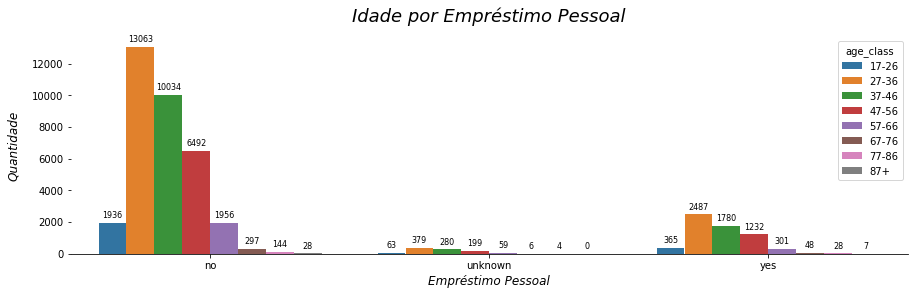

In [412]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = age_loan, x='loan', y='count', hue='age_class')
plt.title('Idade por Empréstimo Pessoal', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Empréstimo Pessoal', fontsize = 12, style = "italic")
plt.ylabel('Quantidade', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Estado Civil x Crédito em Indadimplência

In [413]:
marital_default = df.groupby(['marital', 'default']).size().reset_index(name='count')
marital_default

marital  default  count
0  divorced       no   3781
1  divorced  unknown    831
2   married       no  18655
3   married  unknown   6270
4   married      yes      3
5    single       no  10083
6    single  unknown   1485
7   unknown       no     69
8   unknown  unknown     11

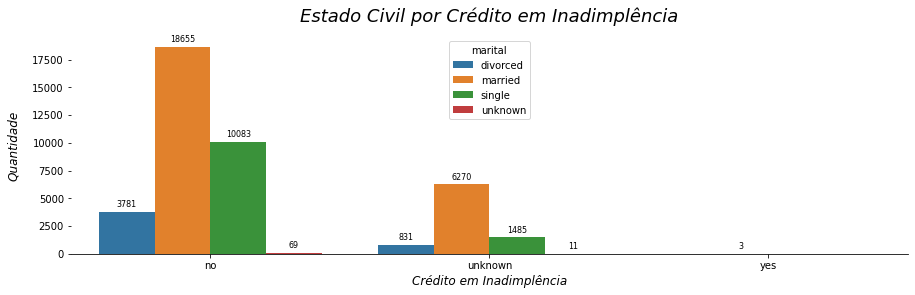

In [414]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = marital_default, x='default', y='count', hue = 'marital')
plt.title('Estado Civil por Crédito em Inadimplência', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Crédito em Inadimplência', fontsize = 12, style = "italic")
plt.ylabel('Quantidade', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Estado Civil x Financiamento de Propriedade

In [415]:
marital_housing = df.groupby(['marital', 'housing']).size().reset_index(name='count')
marital_housing

marital  housing  count
0   divorced       no   2092
1   divorced  unknown    121
2   divorced      yes   2399
3    married       no  11389
4    married  unknown    588
5    married      yes  12951
6     single       no   5097
7     single  unknown    280
8     single      yes   6191
9    unknown       no     44
10   unknown  unknown      1
11   unknown      yes     35

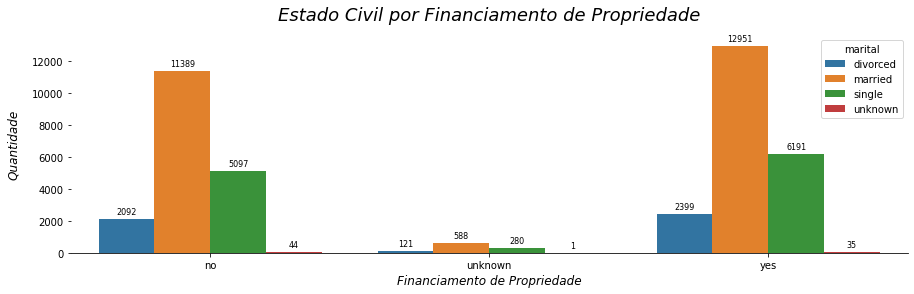

In [416]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = marital_housing, x='housing', y='count', hue = 'marital')
plt.title('Estado Civil por Financiamento de Propriedade', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Financiamento de Propriedade', fontsize = 12, style = "italic")
plt.ylabel('Quantidade', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

##### Estado Civil por Empréstimo Pessoal

In [417]:
marital_loan = df.groupby(['marital', 'loan']).size().reset_index(name='count')
marital_loan

marital     loan  count
0   divorced       no   3816
1   divorced  unknown    121
2   divorced      yes    675
3    married       no  20567
4    married  unknown    588
5    married      yes   3773
6     single       no   9500
7     single  unknown    280
8     single      yes   1788
9    unknown       no     67
10   unknown  unknown      1
11   unknown      yes     12

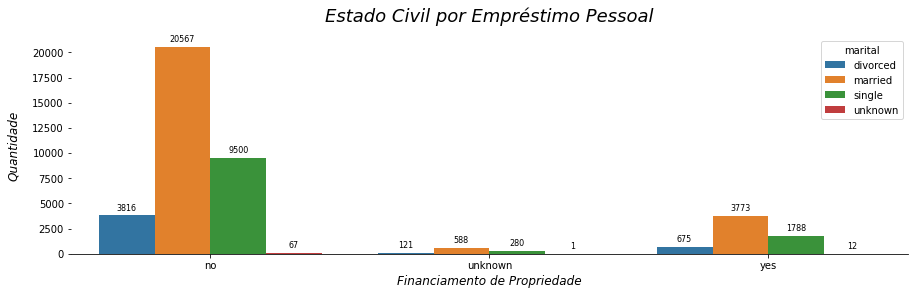

In [418]:
fig, ax = plt.subplots(figsize = (15,4))
sns.barplot(data = marital_loan, x='loan', y='count', hue = 'marital')
plt.title('Estado Civil por Empréstimo Pessoal', fontsize = 18, style = "italic", loc = "center", pad = 15)
plt.xlabel('Financiamento de Propriedade', fontsize = 12, style = "italic")
plt.ylabel('Quantidade', fontsize = 12, style = "italic", labelpad = 12)
for container in ax.containers:
    ax.bar_label(container,size=8, label_type = 'edge', padding = 3)
sns.despine(left=True, top = True)

## Machine Learning

### Importando as Bibliotecas

In [419]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import SMOTE

In [420]:
#variáveis preditoras
X = df.drop(['y', 'duration'], axis = 1)

In [421]:
X.shape

(41188, 20)

In [422]:
#variável-alvo
y = df['y']

In [423]:
y.shape

(41188,)

In [424]:
#dividindo os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [425]:
#colunas numéricas
numeric_cols = X_train.select_dtypes(include=['float', 'int']).columns
numeric_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [426]:
#colunas categóricas
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [427]:
#padronização dos valores numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [428]:
#transformando colunas categóricas em numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder())])

In [429]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])

In [430]:
#ajustando os dados de treinamento
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [431]:
X_train_preprocessed

array([[ 0.96101604, -0.20249907,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.05722877,  0.88720116,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57616512, -0.20249907,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.48217491,  0.16073434,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7708131 ,  0.52396775,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86702583,  0.16073434,  0.19888109, ...,  0.        ,
         1.        ,  0.        ]])

In [432]:
#ajustando os dados de teste
X_test_preprocessed = preprocessor.transform(X_test)

In [433]:
X_test_preprocessed

array([[ 0.86480331, -0.56573248,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.53829241, -0.20249907,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [-0.48217491, -0.56573248,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.7708131 , -0.20249907,  0.19888109, ...,  0.        ,
         1.        ,  0.        ],
       [-0.19353672, -0.20249907,  0.19888109, ...,  1.        ,
         0.        ,  0.        ],
       [-0.86702583, -0.20249907,  0.19888109, ...,  0.        ,
         1.        ,  0.        ]])

In [434]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'no': 36548, 'yes': 4640})


In [435]:
#para balancear os dados utilizando Oversampling
sm = SMOTE(random_state=42)

In [436]:
#balanceando os dados de treinamento
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_preprocessed, y_train)
print('Resampled dataset shape %s' % Counter(y_train_balanced))

Resampled dataset shape Counter({'no': 25583, 'yes': 25583})


In [362]:
#balanceando os dados de teste
X_test_balanced, y_test_balanced = sm.fit_resample(X_test_preprocessed, y_test)
print('Resampled dataset shape %s' % Counter(y_test_balanced))

Resampled dataset shape Counter({'no': 10965, 'yes': 10965})


In [ ]:
#função para o mapa da matriz de confusão
def confusion_matrix_plot(clf, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    fig, axs = plt.subplots(figsize=(8,8))
    acc = round(accuracy_score(y_true, y_pred), 2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    axs.set_title('{} - acc {}'.format(title, acc))
    disp.plot(ax=axs, cmap='Blues', colorbar=False)

In [ ]:
rf = RandomForestClassifier(random_state = 42)

In [ ]:
rf.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_preds = rf.predict(X_test_preprocessed)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_preds)

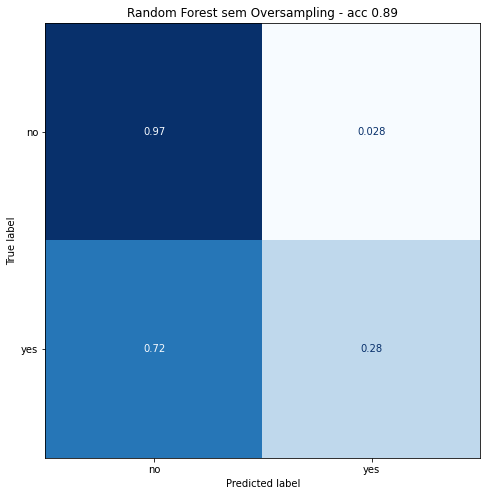

In [ ]:
confusion_matrix_plot(rf, y_test, rf_preds, 'Random Forest sem Oversampling')

In [ ]:
print('Classification Report do Random Forest sem Oversampling:')
print(classification_report(y_test, rf_preds))

Classification Report do Random Forest sem Oversampling:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94     10965
         yes       0.56      0.28      0.38      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



*Com Oversampling*

In [ ]:
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [ ]:
os_rf_preds = rf.predict(X_test_balanced)

In [ ]:
os_rf_accuracy = accuracy_score(y_test_balanced, os_rf_preds)

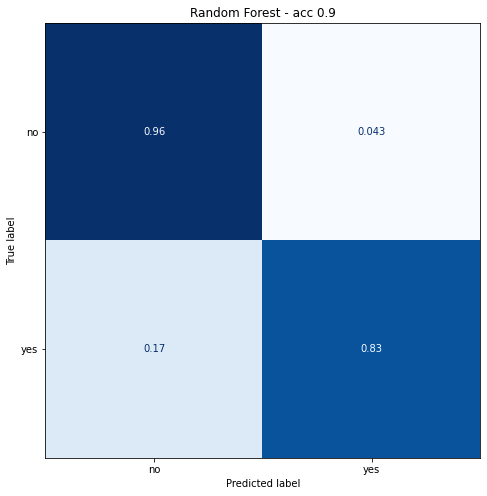

In [ ]:
confusion_matrix_plot(rf, y_test_balanced, os_rf_preds, 'Random Forest')

In [ ]:
print('Classification Report do Random Forest com Oversampling:')
print(classification_report(y_test_balanced, os_rf_preds))

Classification Report do Random Forest com Oversampling:


              precision    recall  f1-score   support

          no       0.85      0.96      0.90     10965
         yes       0.95      0.83      0.89     10965

    accuracy                           0.90     21930
   macro avg       0.90      0.90      0.89     21930
weighted avg       0.90      0.90      0.89     21930

